In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [17]:
df = pd.read_csv('raw_data/carData.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Visualisation des différentes valeurs des variables quantitatives
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Car_Age'}>],
       [<Axes: title={'center': 'Selling_Price'}>,
        <Axes: title={'center': 'Present_Price'}>],
       [<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Owner'}>]], dtype=object)

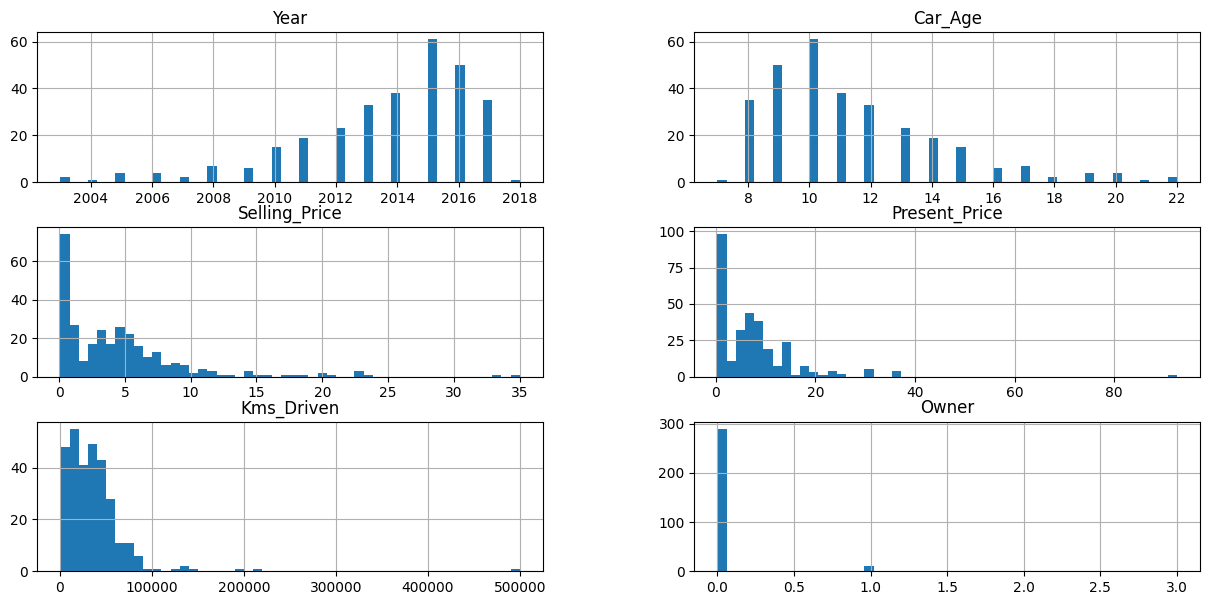

In [ ]:
# Visualisation des différentes valeurs des variables quantitatives
df_organized = df[['Year','Car_Age','Selling_Price','Present_Price','Kms_Driven','Owner']]
df_organized.hist(bins=50, figsize=(15,7))

In [ ]:
# Visualisation des différentes valeurs des variables catégorielles

Fuel_Type_values = df['Fuel_Type'].unique()
Seller_Type_values = df['Seller_Type'].unique()
Transmission_values = df['Transmission'].unique()
Owner_values = df['Owner'].unique()

categorical_values = {
    "Fuel_Type": Fuel_Type_values,
    "Seller_Type": Seller_Type_values,
    "Transmission": Transmission_values,
    "Owner": Owner_values
}

for name, values in categorical_values.items() :
    print(f"{name}_values : {values}")


Fuel_Type_values : ['Petrol' 'Diesel' 'CNG']
Seller_Type_values : ['Dealer' 'Individual']
Transmission_values : ['Manual' 'Automatic']
Owner_values : [0 1 3]


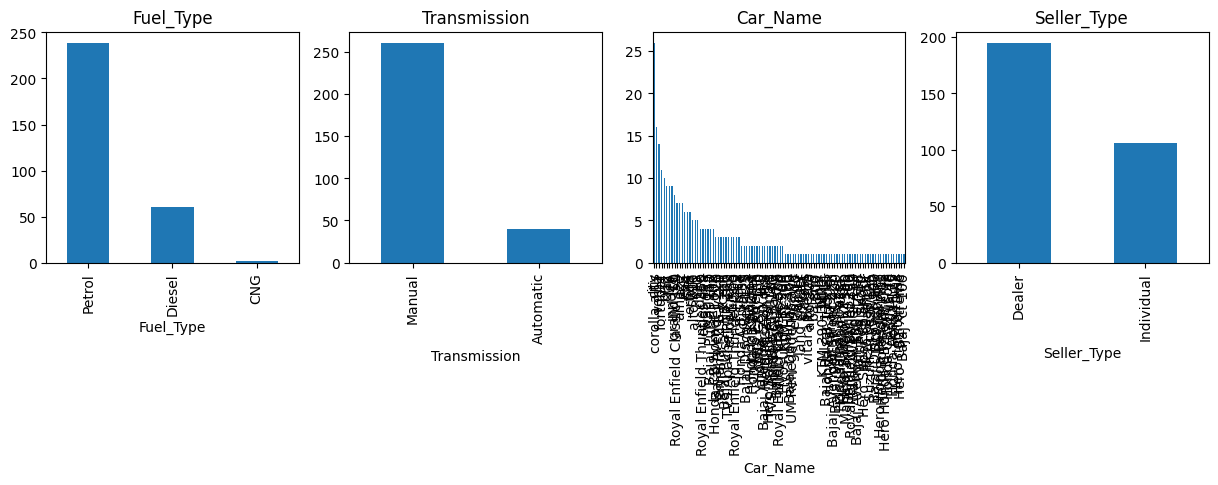

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

colonnes = ['Fuel_Type', 'Transmission', 'Car_Name', 'Seller_Type']

for ax, col in zip(axes.flatten(), colonnes):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)



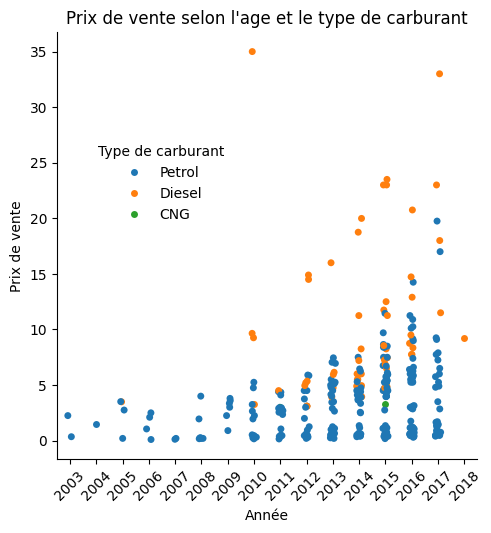

In [ ]:
# catplot permet 
age_fuel_price = sns.catplot(x="Year", y="Selling_Price", 
                hue="Fuel_Type", 
                data=df)
age_fuel_price._legend.set_title("Type de carburant")
age_fuel_price._legend.set_bbox_to_anchor((0.4, 0.7)) 

plt.xticks(rotation=45)
plt.xlabel("Année")
plt.ylabel("Prix de vente")
plt.title("Prix de vente selon l'age et le type de carburant") 

age_fuel_price

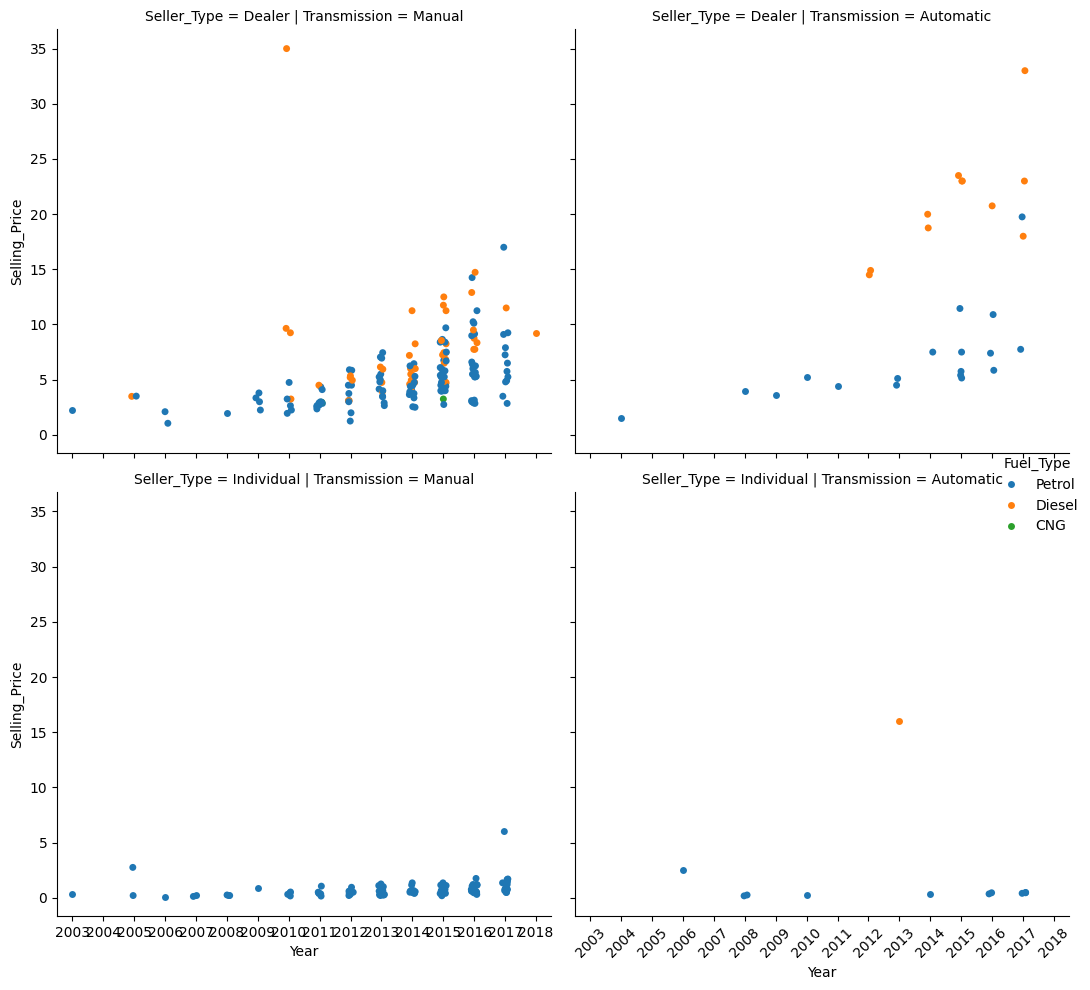

In [12]:
# Option 2: Ajouter row pour créer une grille 2D
g = sns.catplot(x="Year", y="Selling_Price", 
                hue="Fuel_Type", 
                col="Transmission",
                row="Seller_Type",  # Crée une ligne pour chaque type de vendeur
                data=df)
plt.xticks(rotation=45)
plt.tight_layout()

## Recherche de corrélation

Première matrice de corrélation avec les variables quantitatives du jeu de données

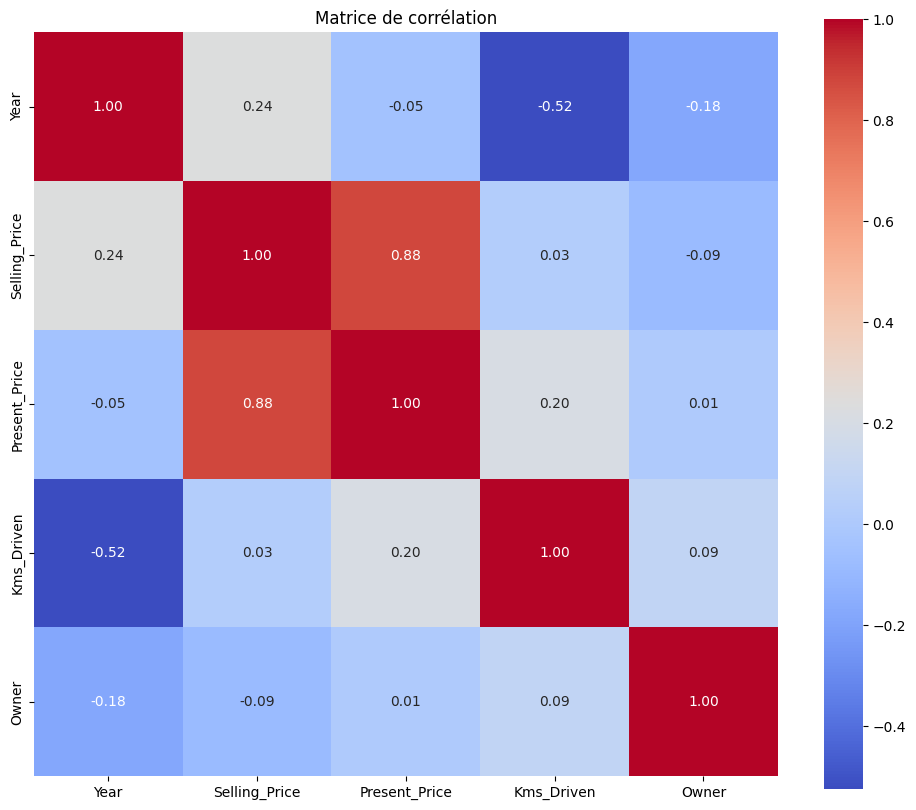

In [13]:
columns_to_keep = ['Year', 'Selling_Price', 'Present_Price','Kms_Driven', 'Owner'
    ]

# Filtrer le DataFrame pour ne garder que les colonnes spécifiées
df_filtered = df[columns_to_keep]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Pour utiliser les variables qualitatives dans une matrice de corrélation, il faut les convertir en valeurs quantitativee 

In [14]:
# Créer les colonnes numériques pour les variables catégorielles
# Fuel_Type
fuel_type_mapping = {"Petrol": 1, "Diesel": 2, "CNG": 3}
df["Fuel_Type_number"] = df["Fuel_Type"].map(fuel_type_mapping)

# Seller_Type
seller_type_mapping = {"Dealer": 1, "Individual": 2}
df["Seller_Type_number"] = df["Seller_Type"].map(seller_type_mapping)

# Transmission
transmission_mapping = {"Manual": 0, "Automatic": 1}
df["Transmission_number"] = df["Transmission"].map(transmission_mapping)

# # Vérifier que les colonnes ont été correctement créées
# df_numeric = df[["Fuel_Type", "Fuel_Type_number", "Seller_Type", "Seller_Type_number", "Transmission", "Transmission_number"]]   
# df_numeric.head()

# df_numeric = df[['Year', 'Selling_Price', 'Present_Price','Kms_Driven', 'Owner', "Fuel_Type_number", "Seller_Type_number", "Transmission_number"]] 


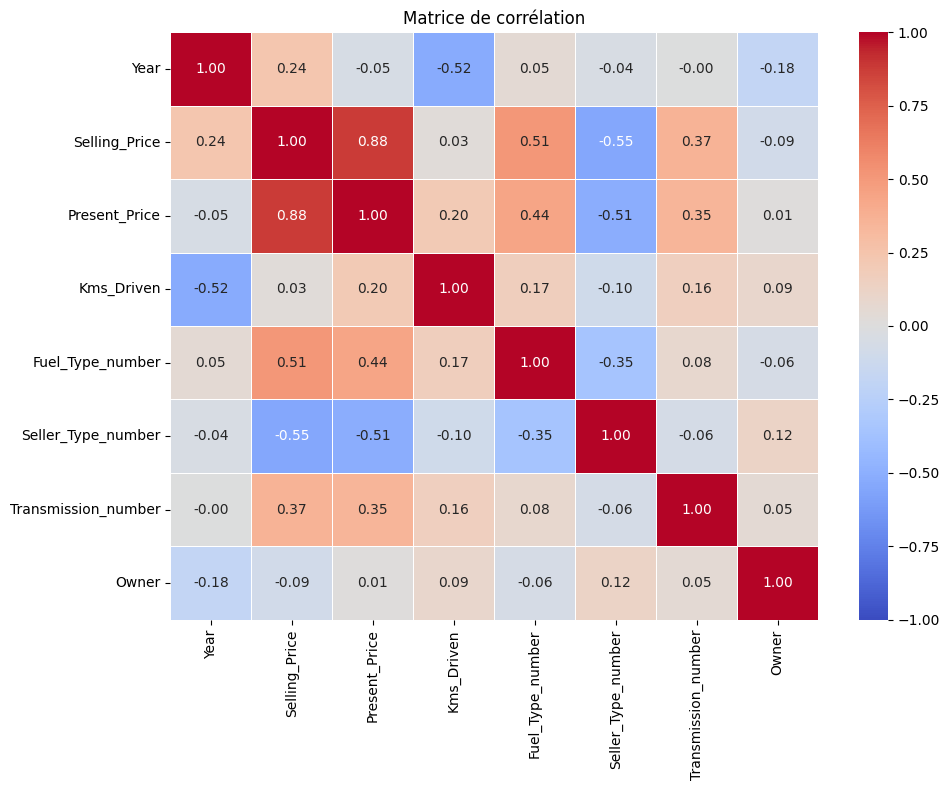

In [15]:
# Sélectionner les colonnes numériques pour la matrice de corrélation
df_numeric = df[["Year", "Selling_Price", "Present_Price", "Kms_Driven", 
                  "Fuel_Type_number", "Seller_Type_number", "Transmission_number", "Owner"]]

# Créer la matrice de corrélation
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.tight_layout()